# Baseline Experiment

In [1]:
# load the experiment design
doe <- read.csv("baseline1_description.csv", header = TRUE)
# load the results
results <- read.csv("straight-run-trial baseline1-table.csv", skip=6, header = TRUE)

# rename the index of the experiment design data to simplify merging
colnames(doe)[1] <- "experiment.number"

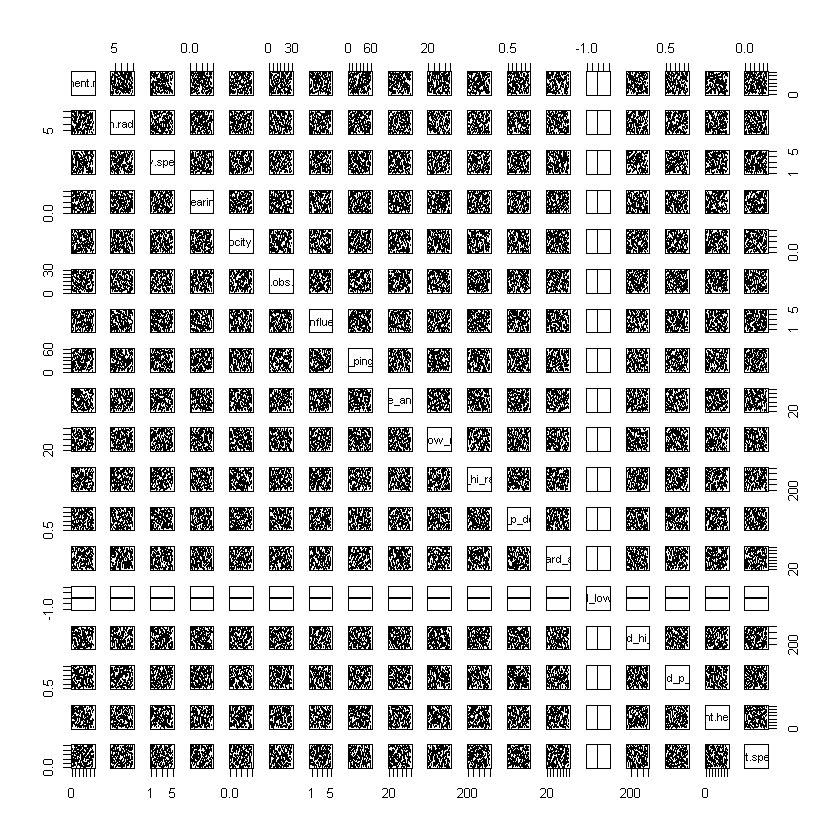

In [4]:
plot(doe, cex=.08)

In [6]:
library(dplyr)

In [7]:
# reduce results from multiple runs as summary statistics
results %>% 
    group_by(experiment.number) %>% 
    summarise(speed_mean=mean(objective.mine.speed),
             speed_max=max(objective.mine.speed),
             speed_min=min(objective.mine.speed),
             speed_median=median(objective.mine.speed),
             collisions_mean=mean(number.of.collisions),
             collisions_max=max(number.of.collisions),
             nav_error_mean=mean(max.nav.error),
             nav_error_max=max(max.nav.error),
             accuracy_mean=mean(objective.mine.position),
             accuracy_max=max(objective.mine.position),
             accuracy_median = median(objective.mine.position),
             percent_mean = mean(objective.mine.detected.ratio),
             percent_max = max(objective.mine.detected.ratio),
             percent_median = median(objective.mine.detected.ratio)) %>%
    merge(doe, by="experiment.number") -> processed_data

head(processed_data)

experiment.number,speed_mean,speed_max,speed_min,speed_median,collisions_mean,collisions_max,nav_error_mean,nav_error_max,accuracy_mean,...,side_angle,side_low_range,side_hi_range,side_p_detect,forward_angle,forward_low_range,forward_hi_range,forward_p_detect,current.heading,drift.speed
0,-11.6890,-5.657,-14.750,-13.8080,0.0,0,3162.3792,4488.359,-30.280398,...,33.40019,31.21306,503.9605,0.5963998,47.57132,0,402.33166,0.9485225,314.1130,0.32635654
1,-11.6566,-6.503,-14.225,-12.6780,0.0,0,3344.3865,4474.549,-26.902773,...,83.44645,38.32825,630.3918,0.6094939,84.22662,0,437.20969,0.7842970,324.2418,0.09361125
2,-6.1065,-1.640,-13.600,-4.1200,0.0,0,2006.4215,4783.961,-16.097140,...,118.90384,28.21201,307.4934,0.7220034,68.85675,0,47.65737,0.7008625,215.4336,0.39343054
3,-0.1445,0.708,-0.882,-0.1425,0.1,1,891.6569,2202.504,-5.537774,...,66.03849,25.02403,438.8276,0.6222699,61.34213,0,103.79857,0.7056319,166.0557,0.35462073
4,-7.2981,1.499,-14.400,-8.6565,0.0,0,2794.3418,4232.630,-21.411102,...,80.94353,30.60777,508.0257,0.8577738,78.37041,0,287.35060,0.9191312,330.3464,0.10151552
5,-6.1485,0.079,-13.750,-2.7910,0.0,0,2838.9727,5587.600,-29.427777,...,87.65829,20.16138,665.0553,0.9462549,58.19470,0,224.48775,0.5174894,146.8298,0.40201797


In [8]:
cor(processed_data)

Warning message in cor(processed_data):
"the standard deviation is zero"

,experiment.number,speed_mean,speed_max,speed_min,speed_median,collisions_mean,collisions_max,nav_error_mean,nav_error_max,accuracy_mean,...,side_angle,side_low_range,side_hi_range,side_p_detect,forward_angle,forward_low_range,forward_hi_range,forward_p_detect,current.heading,drift.speed
experiment.number,1.0000000000,0.08136463,0.02950108,0.03607216,0.087529265,0.10899226,0.094738791,-0.081682286,-0.0004539755,0.0921581827,...,-0.046002767,0.051559989,-0.059926603,4.135866e-02,0.017593232,NA,0.0087942904,0.054747752,-0.111958810,0.0451987173
speed_mean,0.0813646266,1.00000000,0.77830517,0.78785663,0.947913933,0.13982111,0.105309358,-0.776383256,-0.6432872125,0.8463384789,...,0.129755754,-0.097166032,0.222786854,-4.787880e-02,0.042831947,NA,-0.0573022935,-0.014057000,-0.169885152,-0.0216354843
speed_max,0.0295010833,0.77830517,1.00000000,0.45135354,0.724075258,0.01769224,-0.020027472,-0.359969259,-0.2440301029,0.5534075718,...,0.112144885,-0.089004656,0.293331586,1.658810e-02,0.088859470,NA,-0.1220450415,0.015250247,-0.075906513,-0.0808231749
speed_min,0.0360721613,0.78785663,0.45135354,1.00000000,0.626382381,0.17142459,0.130014246,-0.768064333,-0.7727389022,0.7497980669,...,0.103034383,-0.088915985,0.126729083,-1.222957e-01,0.037487283,NA,0.0207954163,-0.058254970,-0.126603852,-0.0170458650
speed_median,0.0875292652,0.94791393,0.72407526,0.62638238,1.000000000,0.13459637,0.106010174,-0.727749303,-0.5520870365,0.7873455770,...,0.100551955,-0.077449492,0.202690794,-1.910763e-02,0.018751802,NA,-0.0621202495,-0.010559827,-0.166862701,-0.0124083890
collisions_mean,0.1089922643,0.13982111,0.01769224,0.17142459,0.134596372,1.00000000,0.891315686,-0.257088799,-0.2626396390,0.2073973643,...,-0.012559844,-0.076580819,0.011933221,-3.396276e-02,-0.107264725,NA,-0.1022285425,-0.065272243,-0.024360330,0.1216576934
collisions_max,0.0947387909,0.10530936,-0.02002747,0.13001425,0.106010174,0.89131569,1.000000000,-0.216265790,-0.2203087318,0.1625847326,...,0.032137793,-0.061995159,0.006580669,7.844728e-03,-0.098015957,NA,-0.0494420550,-0.017452885,-0.059631066,0.1598832300
nav_error_mean,-0.0816822862,-0.77638326,-0.35996926,-0.76806433,-0.727749303,-0.25708880,-0.216265790,1.000000000,0.8978820446,-0.8714838366,...,-0.052393520,0.017901891,-0.053498054,6.618951e-02,0.013471115,NA,-0.0643914337,0.046322247,0.129861425,0.0090154059
nav_error_max,-0.0004539755,-0.64328721,-0.24403010,-0.77273890,-0.552087036,-0.26263964,-0.220308732,0.897882045,1.0000000000,-0.7453685715,...,-0.037623880,0.022293202,-0.046629310,1.188477e-01,0.024918768,NA,-0.0848828114,0.067271029,0.089704277,0.0769525103
accuracy_mean,0.0921581827,0.84633848,0.55340757,0.74979807,0.787345577,0.20739736,0.162584733,-0.871483837,-0.7453685715,1.0000000000,...,0.124992279,-0.020432027,0.001938377,-5.469042e-02,0.001127072,NA,-0.0006588922,-0.018404105,-0.178416920,0.0001737158


## Evaluate Probability of Detection on Metrics

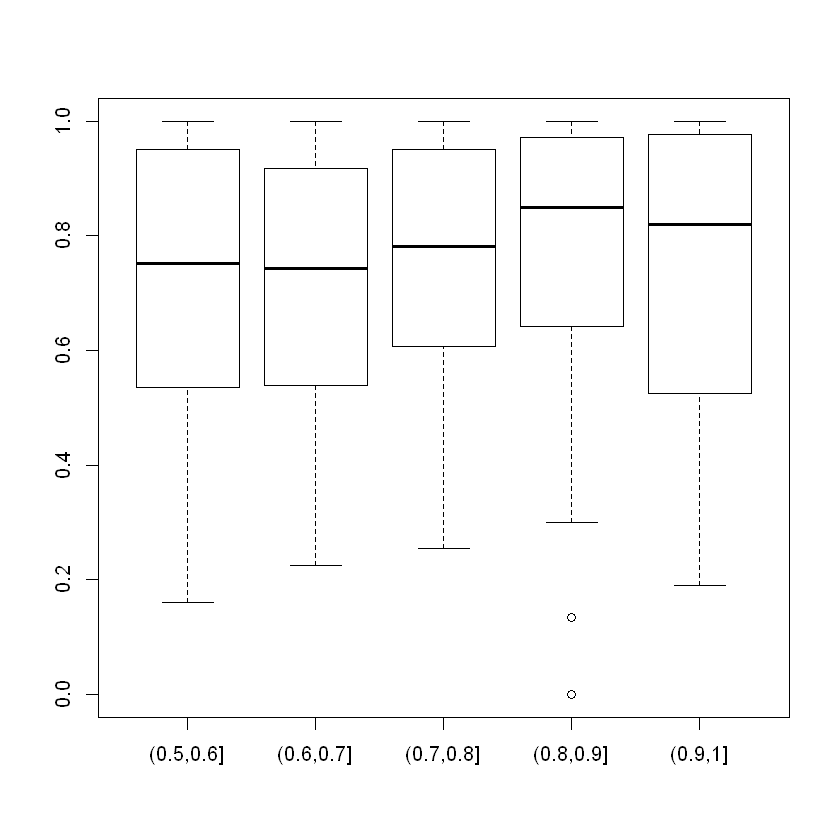

In [9]:
boxplot(processed_data$percent_max ~ cut(processed_data$side_p_detect, c(.5,.6,.7,.8,.9,1)))

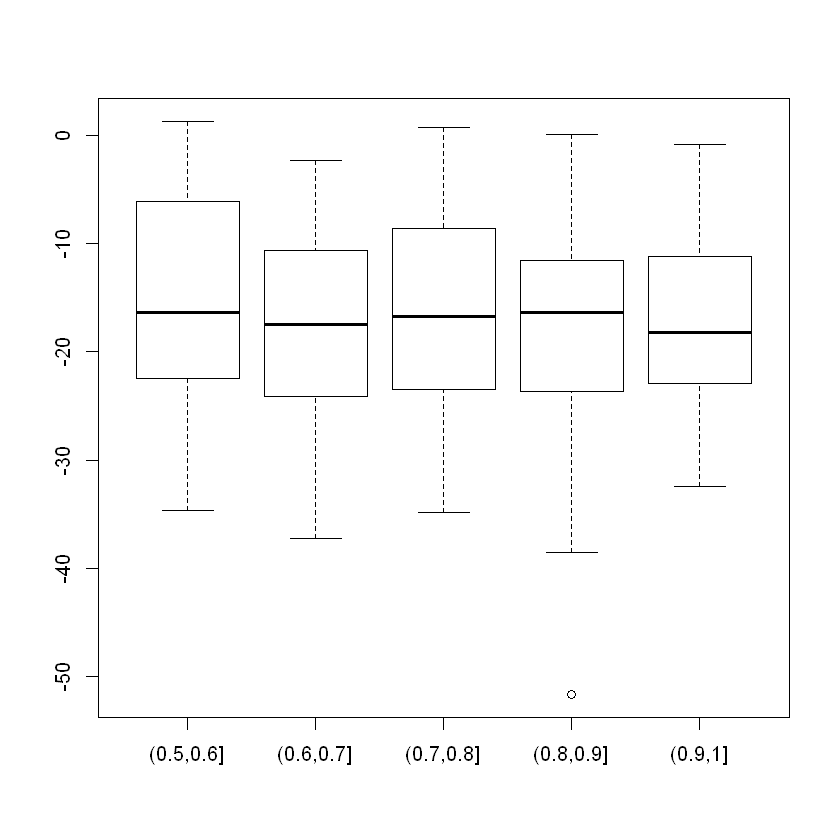

In [14]:
boxplot(processed_data$accuracy_mean ~ cut(processed_data$side_p_detect, c(.5,.6,.7,.8,.9,1)))

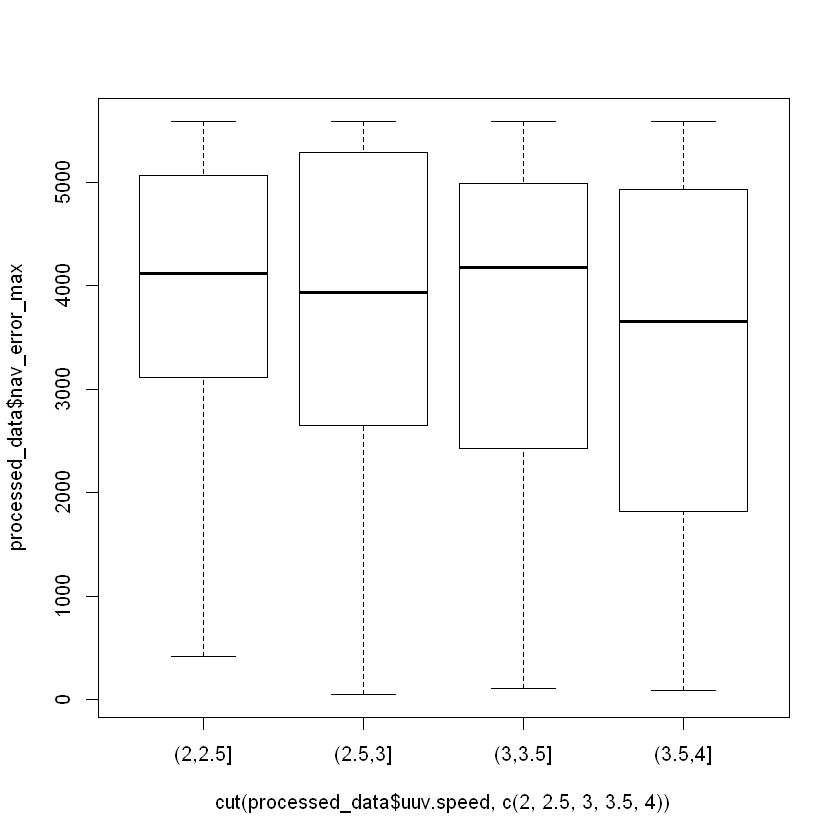

In [17]:
plot(processed_data$nav_error_max ~ cut(processed_data$uuv.speed, c(2,2.5,3,3.5,4)))